# **1. Overwiew*

# **2. Business and Data Understanding**
## **2.1 Business Problem**



## **2.2 Data Understanding**

### **2.2.1 Dataset Features**
The dataset employed in the study was downloaded from https://data.world/crowdflower/brands-and-product-emotions/file/judge-1377884607_tweet_product_company.csv 

### **2.2.2 Dataset Features**
The following feature about ____ are provided:





## **2.3 Methodology**
The adopted structure for the project was CRISP-DM that entails undertaking Business understanding; Data Understanding; Data Preparation; Data Cleaning and Exploratory Data Analysis (EDA); Modelling; Conclusion and Recommendations.

# **3. Data Cleaning and EDA**
## **3.1 Data Cleaning & Preparation**
Importing packages

In [85]:
# Importing standard packages
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
from textwrap import fill 

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
import warnings
import math
warnings.filterwarnings("ignore")

# from sklearn.pipeline import Pipeline

#classification models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

# classification metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# scalers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer, label_binarize

# dummies
from sklearn.preprocessing import OneHotEncoder

# NLP libraries
from nltk.corpus import stopwords, wordnet
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer, word_tokenize
import re
from nltk import FreqDist
from nltk import pos_tag
from wordcloud import WordCloud 

# imbalanced-learn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [86]:
# loading the dataset
sentiment_data = pd.read_csv("data/judge-1377884607_tweet_product_company.csv", encoding="ISO-8859-1")
sentiment_data

tweet_text  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1     @jessedee Know about @fludapp ? Awesome iPad/i...   
2     @swonderlin Can not wait for #iPad 2 also. The...   
3     @sxsw I hope this year's festival isn't as cra...   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...   
...                                                 ...   
9088                      Ipad everywhere. #SXSW {link}   
9089  Wave, buzz... RT @mention We interrupt your re...   
9090  Google's Zeiger, a physician never reported po...   
9091  Some Verizon iPhone customers complained their...   
9092  Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...   

     emotion_in_tweet_is_directed_at  \
0                             iPhone   
1                 iPad or iPhone App   
2                               iPad   
3                 iPad or iPhone App   
4                             Google   
...                              ...   
9088                            iPad   
9089                             NaN   
9090                             NaN   
9091                             NaN   
9092                             NaN   

     is_there_an_emotion_directed_at_a_brand_or_product  
0                                      Negative emotion  
1                                      Positive emotion  
2                                      Positive emotion  
3                                      Negative emotion  
4                                      Positive emotion  
...                                                 ...  
9088                                   Positive emotion  
9089                 No emotion toward brand or product  
9090                 No emotion toward brand or product  
9091                 No emotion toward brand or product  
9092                 No emotion toward brand or product  

[9093 rows x 3 columns]

In [87]:
# checking the data types
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [88]:
# rename the column names for easier analysis
sentiment_data.rename(columns=
                      {
    "tweet_text":"text",
    "emotion_in_tweet_is_directed_at":"product",
    "is_there_an_emotion_directed_at_a_brand_or_product":"sentiment"
},
                      inplace=True)
sentiment_data

text             product  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1     @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2     @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3     @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   
...                                                 ...                 ...   
9088                      Ipad everywhere. #SXSW {link}                iPad   
9089  Wave, buzz... RT @mention We interrupt your re...                 NaN   
9090  Google's Zeiger, a physician never reported po...                 NaN   
9091  Some Verizon iPhone customers complained their...                 NaN   
9092  Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...                 NaN   

                               sentiment  
0                       Negative emotion  
1                       Positive emotion  
2                       Positive emotion  
3                       Negative emotion  
4                       Positive emotion  
...                                  ...  
9088                    Positive emotion  
9089  No emotion toward brand or product  
9090  No emotion toward brand or product  
9091  No emotion toward brand or product  
9092  No emotion toward brand or product  

[9093 rows x 3 columns]

In [89]:
#  encode the sentiments column (from test to numerical using label mapping)

# clean whitespaces in the sentiment column
sentiment_data["sentiment"] = sentiment_data["sentiment"].str.strip()

# apply the label mapping
label_mapping = {
    "Negative emotion" : '1',
    "Positive emotion" : '3',
    "No emotion toward brand or product" : '5',
    "I can't tell" : 'irrelevant'  
}

sentiment_data["sentiment"] = sentiment_data["sentiment"].map(label_mapping)

#previewing the 1st 5 rows
sentiment_data.head()

text             product  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3  @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   

  sentiment  
0         1  
1         3  
2         3  
3         1  
4         3

In [90]:
# drop the "product" column as it has too many null values and only use two columns in the analysis. 

# since we are building a model to rate the sentiment if a tweet based on its content, then the feature variable (y) is the "text" column while the target variable (x) is the "sentiment" column

# column to be dropped
drop_col = ["product"]

# dropping the column
sentiment_data = sentiment_data.drop(drop_col, axis=1)

# checking the information of the new dataset
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       9092 non-null   object
 1   sentiment  9093 non-null   object
dtypes: object(2)
memory usage: 142.2+ KB


The new dataframe has 2 columns and 9093 rows. Column "text" has a missing value. The dataframe is made up of one datatype: object.

In [91]:
# dropping the null value
sentiment_data = sentiment_data.dropna()

# confirming no null values are remaining
sentiment_data.isna().sum()

text         0
sentiment    0
dtype: int64

In [92]:
# checking the summary statistics of the data
sentiment_data.describe()

text sentiment
count                                                9092      9092
unique                                               9065         4
top     RT @mention Marissa Mayer: Google Will Connect...         5
freq                                                    5      5388

sentiment has 4 unique categories with 5(no emotion toward brand or product i.e. neutral) taking about 59.26% (5388 out of 9092 entries)  of the data.This creates an imbalance in the dataset.  

sentiment is expected to have 3 labels (1 - Negative emotion, 3 - Positive Emotion, 5 - no emotion) and not 4. There is need to drop the 4th label (irrelevant).

In [93]:
# check for duplicates
sentiment_data[sentiment_data.duplicated()]

text sentiment
468      Before It Even Begins, Apple Wins #SXSW {link}         3
776   Google to Launch Major New Social Network Call...         5
2232  Marissa Mayer: Google Will Connect the Digital...         5
2559  Counting down the days to #sxsw plus strong Ca...         3
3950  Really enjoying the changes in Gowalla 3.0 for...         3
3962  #SXSW is just starting, #CTIA is around the co...         3
4897  Oh. My. God. The #SXSW app for iPad is pure, u...         3
5338  RT @mention ÷¼ GO BEYOND BORDERS! ÷_ {link} ...         5
5341  RT @mention ÷¼ Happy Woman's Day! Make love, ...         5
5881  RT @mention Google to Launch Major New Social ...         5
5882  RT @mention Google to Launch Major New Social ...         5
5883  RT @mention Google to Launch Major New Social ...         5
5884  RT @mention Google to Launch Major New Social ...         5
5885  RT @mention Google to Launch Major New Social ...         5
6296  RT @mention Marissa Mayer: Google Will Connect...         3
6297  RT @mention Marissa Mayer: Google Will Connect...         5
6298  RT @mention Marissa Mayer: Google Will Connect...         3
6299  RT @mention Marissa Mayer: Google Will Connect...         5
6300  RT @mention Marissa Mayer: Google Will Connect...         5
6546  RT @mention RT @mention Google to Launch Major...         5
8483  I just noticed DST is coming this weekend. How...         1
8747  Need to buy an iPad2 while I'm in Austin at #s...         3

In [94]:
# drop duplicates
sentiment_data.drop_duplicates(inplace=True)

## **3.2 Data Preprocessing**
To remove stop words, punctuation marks and carry out lemmatization

In [95]:
# define a function to preprocess the data

def get_wordnet_pos(word): #helper function for Part of Speech (POS)  aware lemmatization in nltk 
    """Map POS tag to the first character that lemmatizer() accepts"""
    tag = pos_tag([word])[0][1][0].upper() # gives the POS tag for the word and extracts the first letter of the tag
    tag_dict = {
        "J": wordnet.ADJ,"N": wordnet.NOUN,
        "V": wordnet.VERB, "R": wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN) # maps the letters to WordNet's lemmitazation frmat .If the POS tag isn't found, it returns (defaults) to noun

def cleaned_text (text):
    stopword_list = stopwords.words("english")
    stopword_list += list(string.punctuation)
    lemmatizer = WordNetLemmatizer()
    
    # regex cleaning - to remove usernames, hyperlinks, hashtags, mentions etc
    text = re.sub(r"https?://\S+|www\.\S+", "", text) #removes links
    text = re.sub(r"@\w+", "", text) # removes mentions
    text = re.sub(r"#", "", text) # remove hashtag (#), but keeps the word
    text = re.sub(r"\.\.+",".", text)  # replaces multiple dots
    
    # tokenize the text
    text = word_tokenize(text)
    
    # lowercase and remove the stopwords
    text = [word.lower() for word in text if word.lower() not in stopword_list] 
    
    #lemmatize with POS tagging
    text = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in text]
    
    # join preprocessed text as a single string
    text = ' '.join(text)
    
    return text

In [96]:
#call the function and apply to the text column
sentiment_data["cleaned_text"] = sentiment_data["text"].apply(cleaned_text)

sentiment_data[["text", "cleaned_text"]].head()

text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

                                        cleaned_text  
0  3g iphone 3 hr tweet rise_austin dead need upg...  
1  know awesome ipad/iphone app 'll likely apprec...  
2                         wait ipad 2 also sale sxsw  
3  hope year 's festival n't crashy year 's iphon...  
4  great stuff fri sxsw marissa mayer google tim ...

In [97]:
sentiment_data

text sentiment  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...         1   
1     @jessedee Know about @fludapp ? Awesome iPad/i...         3   
2     @swonderlin Can not wait for #iPad 2 also. The...         3   
3     @sxsw I hope this year's festival isn't as cra...         1   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...         3   
...                                                 ...       ...   
9088                      Ipad everywhere. #SXSW {link}         3   
9089  Wave, buzz... RT @mention We interrupt your re...         5   
9090  Google's Zeiger, a physician never reported po...         5   
9091  Some Verizon iPhone customers complained their...         5   
9092  Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...         5   

                                           cleaned_text  
0     3g iphone 3 hr tweet rise_austin dead need upg...  
1     know awesome ipad/iphone app 'll likely apprec...  
2                            wait ipad 2 also sale sxsw  
3     hope year 's festival n't crashy year 's iphon...  
4     great stuff fri sxsw marissa mayer google tim ...  
...                                                 ...  
9088                          ipad everywhere sxsw link  
9089  wave buzz rt interrupt regularly schedule sxsw...  
9090  google 's zeiger physician never report potent...  
9091  verizon iphone customer complain time fell bac...  
9092  ï¡ïàü_êîò£áââ_£â_ûârt g...  

[9070 rows x 3 columns]

## **3.3 EDA**

### **3.3.1. Visualization of Target Variable**

In [98]:
# drop the irrelevant label and check the remaining labels

sentiment_data = sentiment_data.query('sentiment != "irrelevant"')

#confirm removal of the label
sentiment_data["sentiment"].value_counts()

sentiment
5    5375
3    2970
1     569
Name: count, dtype: int64

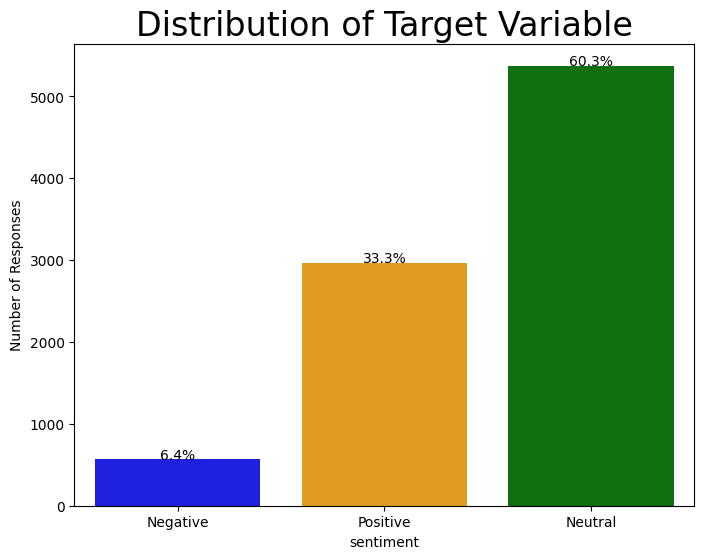

In [99]:
#visualizing the distribution of sentiment
#creating the seaborn count plot
fig, ax = plt.subplots(figsize=(8, 6))
colors = ["Blue", "Orange", "Green"]
ax = sns.countplot(x="sentiment", data=sentiment_data, ax=ax, palette=colors)

#calculating the total
total = len(sentiment_data)

#adding percentage annotation on each bar
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    percentage = (height / total) * 100  # Calculate the percentage
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1, f'{percentage:.1f}%', ha='center')


#labeling the graph
ax.set_xticklabels(["Negative", "Positive", "Neutral"])
plt.ylabel("Number of Responses")
#plt.xlabel("Sentiment")
ax.set_title("Distribution of Target Variable", fontsize=24)
plt.show()

#saving the plot as jpeg 
fig.savefig("images/functionality_plot.jpeg", format="jpeg", dpi=300)

6.4% of the responses were negative, 33.3% positive while the remaining 60.3% were neutral. The data looks imbalanced with in that neutral takes more than 50% of the data and Negative less than 10%. 

### **3.3.2 Most Common word in the Dataset**
Frequently used words appear enlarged as compared to less frequently used words.

In [100]:
# convert sentiment column to integer
sentiment_data["sentiment"] = sentiment_data["sentiment"].astype(int)
sentiment_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8914 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          8914 non-null   object
 1   sentiment     8914 non-null   int64 
 2   cleaned_text  8914 non-null   object
dtypes: int64(1), object(2)
memory usage: 278.6+ KB


In [101]:
print(sentiment_data['sentiment'].unique().dtype)

int64


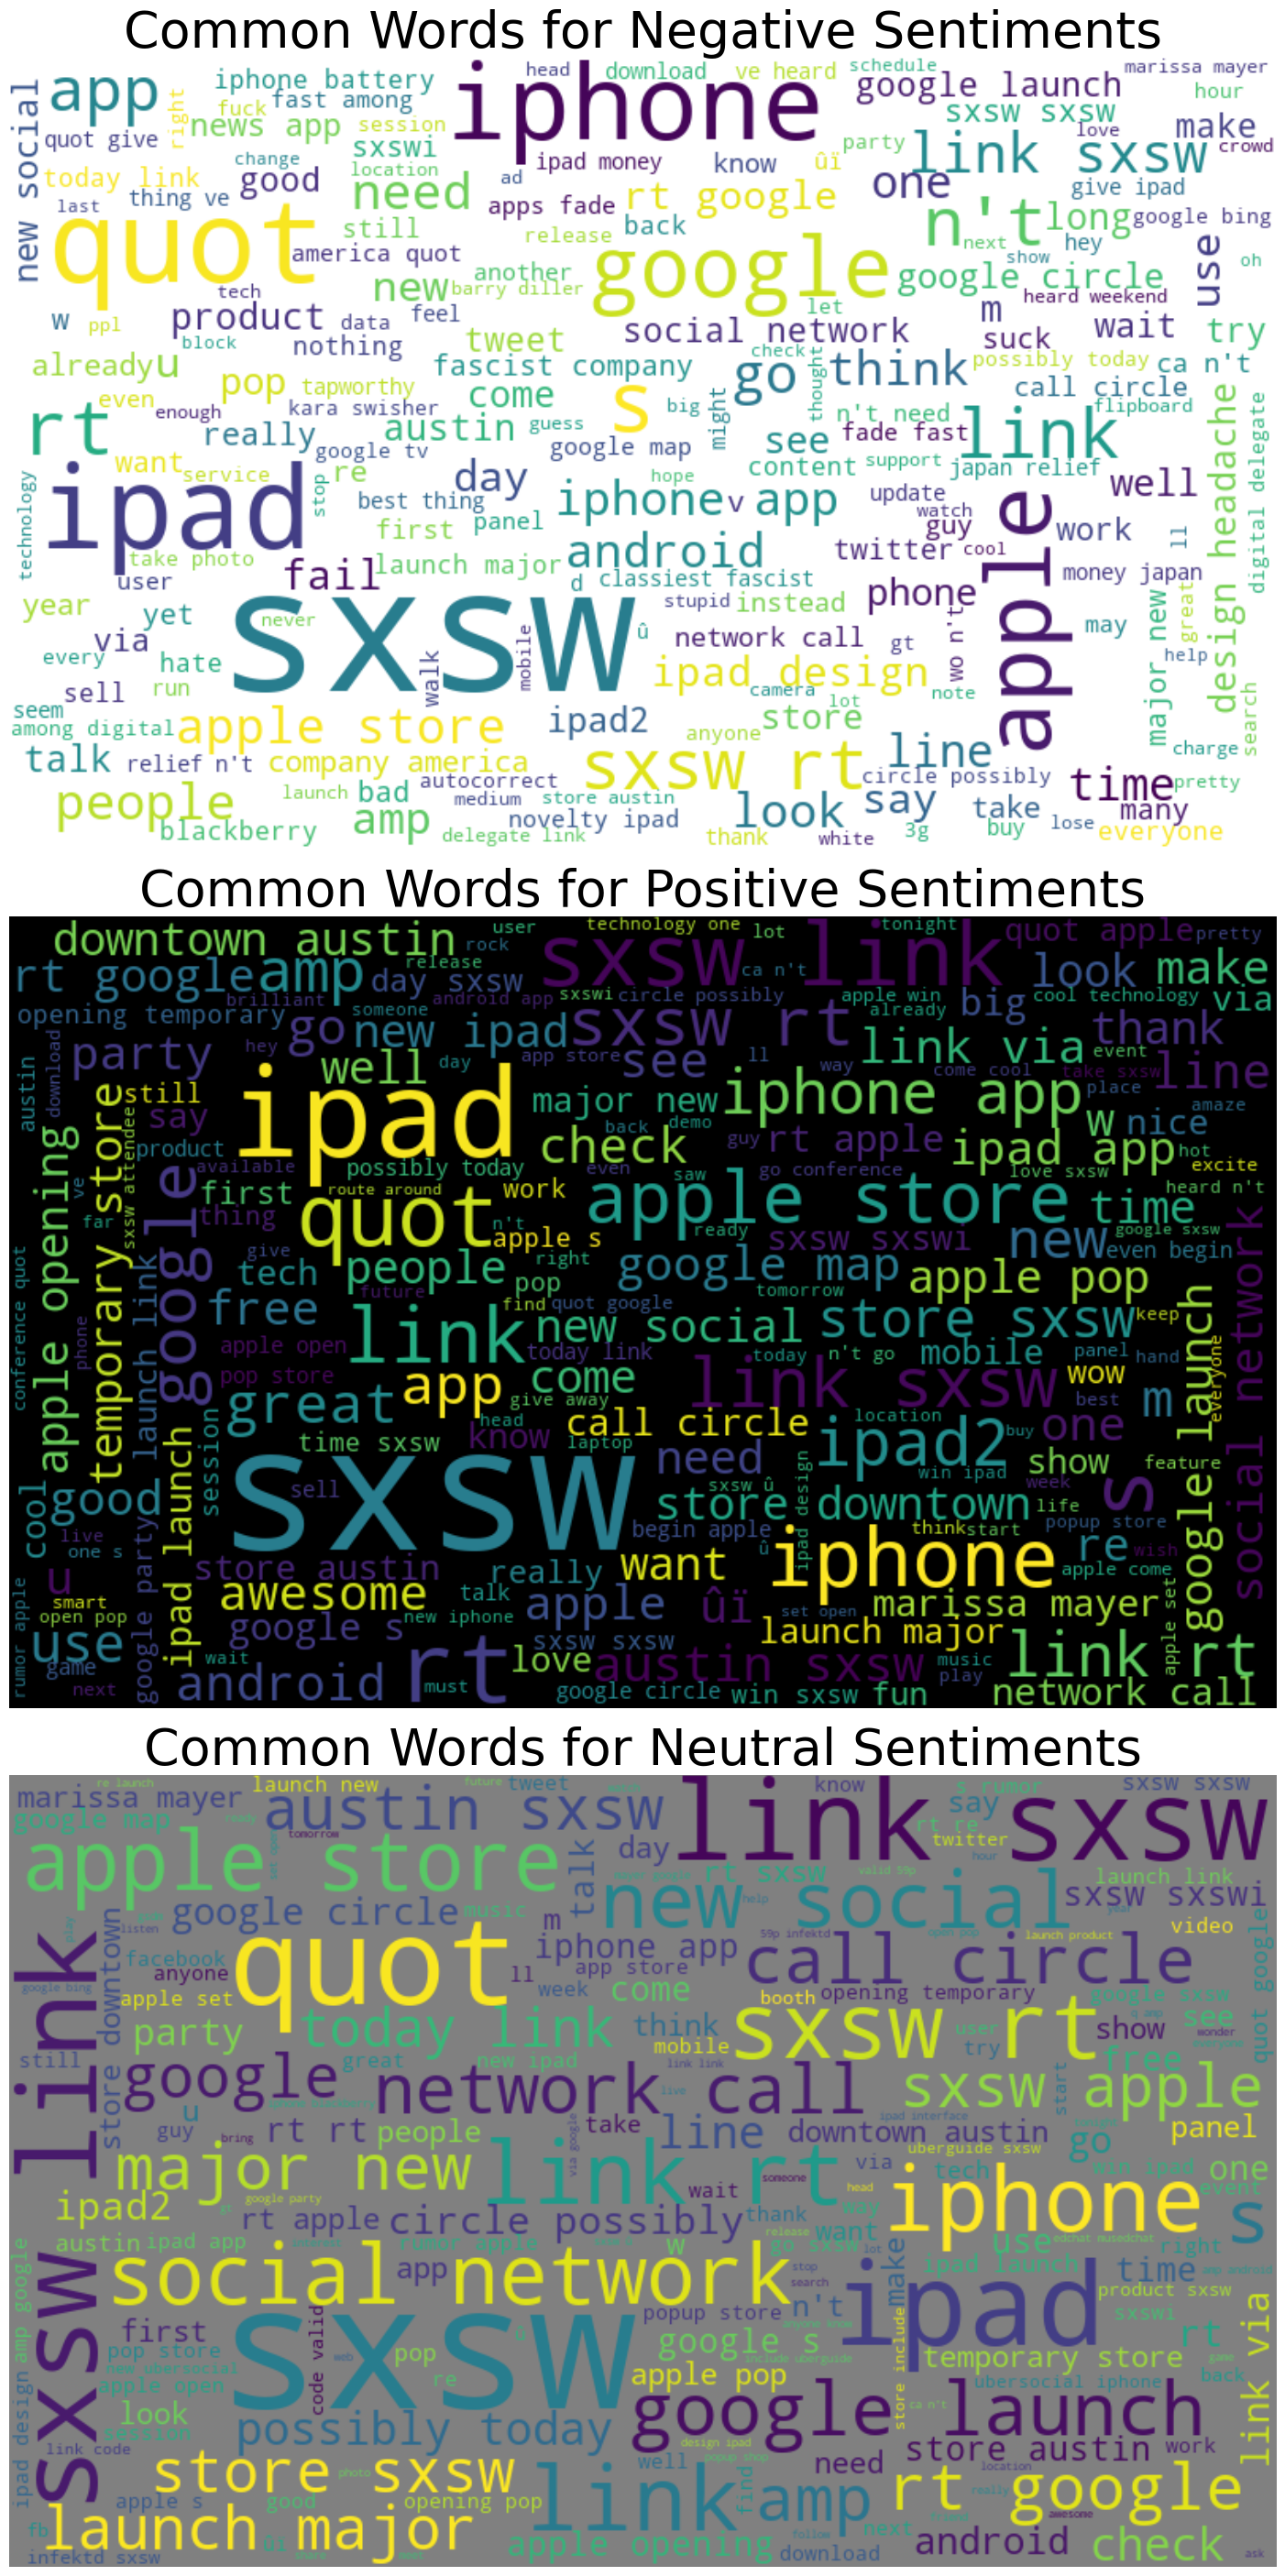

In [102]:
#create subplots
fig,axes = plt.subplots(3,1, figsize = (18, 28), constrained_layout = True)
axes = axes.flatten()

# negative words
negative_words = ' '.join(sentiment_data.query("sentiment==1")['cleaned_text'])
if negative_words.strip():
#generate word cloud
    wc_neg = WordCloud(
        width = 800,
        height = 500,
        random_state = 21,
        max_font_size = 110,
        background_color = "white",
        ).generate(negative_words) 

    axes[0].imshow(wc_neg, interpolation="bilinear")
    axes[0].axis('off')
    axes[0].set_title("Common Words for Negative Sentiments", fontsize=40)
fig.savefig("images/negative_plot.jpeg", format="jpeg", dpi=300)


# positive words
positive_words = ' '.join(sentiment_data.query("sentiment==3")['cleaned_text'])
if positive_words.strip():
#generate word cloud
    wc_pos = WordCloud(
        width = 800,
        height = 500,
        random_state = 21,
        max_font_size = 110,
        background_color = "black",
        ).generate(positive_words) 

    axes[1].imshow(wc_pos, interpolation="bilinear")
    axes[1].axis('off')
    axes[1].set_title("Common Words for Positive Sentiments", fontsize=40)
    fig.savefig("images/positive_plot.jpeg", format="jpeg", dpi=300)


# neutral/no-emotion words
neutral_words = ' '.join(sentiment_data.query("sentiment==5")['cleaned_text'])
if neutral_words.strip():
#generate word cloud
    neu_pos = WordCloud(
        width = 800,
        height = 500,
        random_state = 21,
        max_font_size = 110,
        background_color = "grey",
        ).generate(neutral_words) 

    axes[2].imshow(neu_pos, interpolation="bilinear")
    axes[2].axis('off')
    axes[2].set_title("Common Words for Neutral Sentiments", fontsize=40)
    fig.savefig("images/neutral_plot.jpeg", format="jpeg", dpi=300)

plt.show()

Frequency Distribution of most common words (Negative, Neutral and Positive)

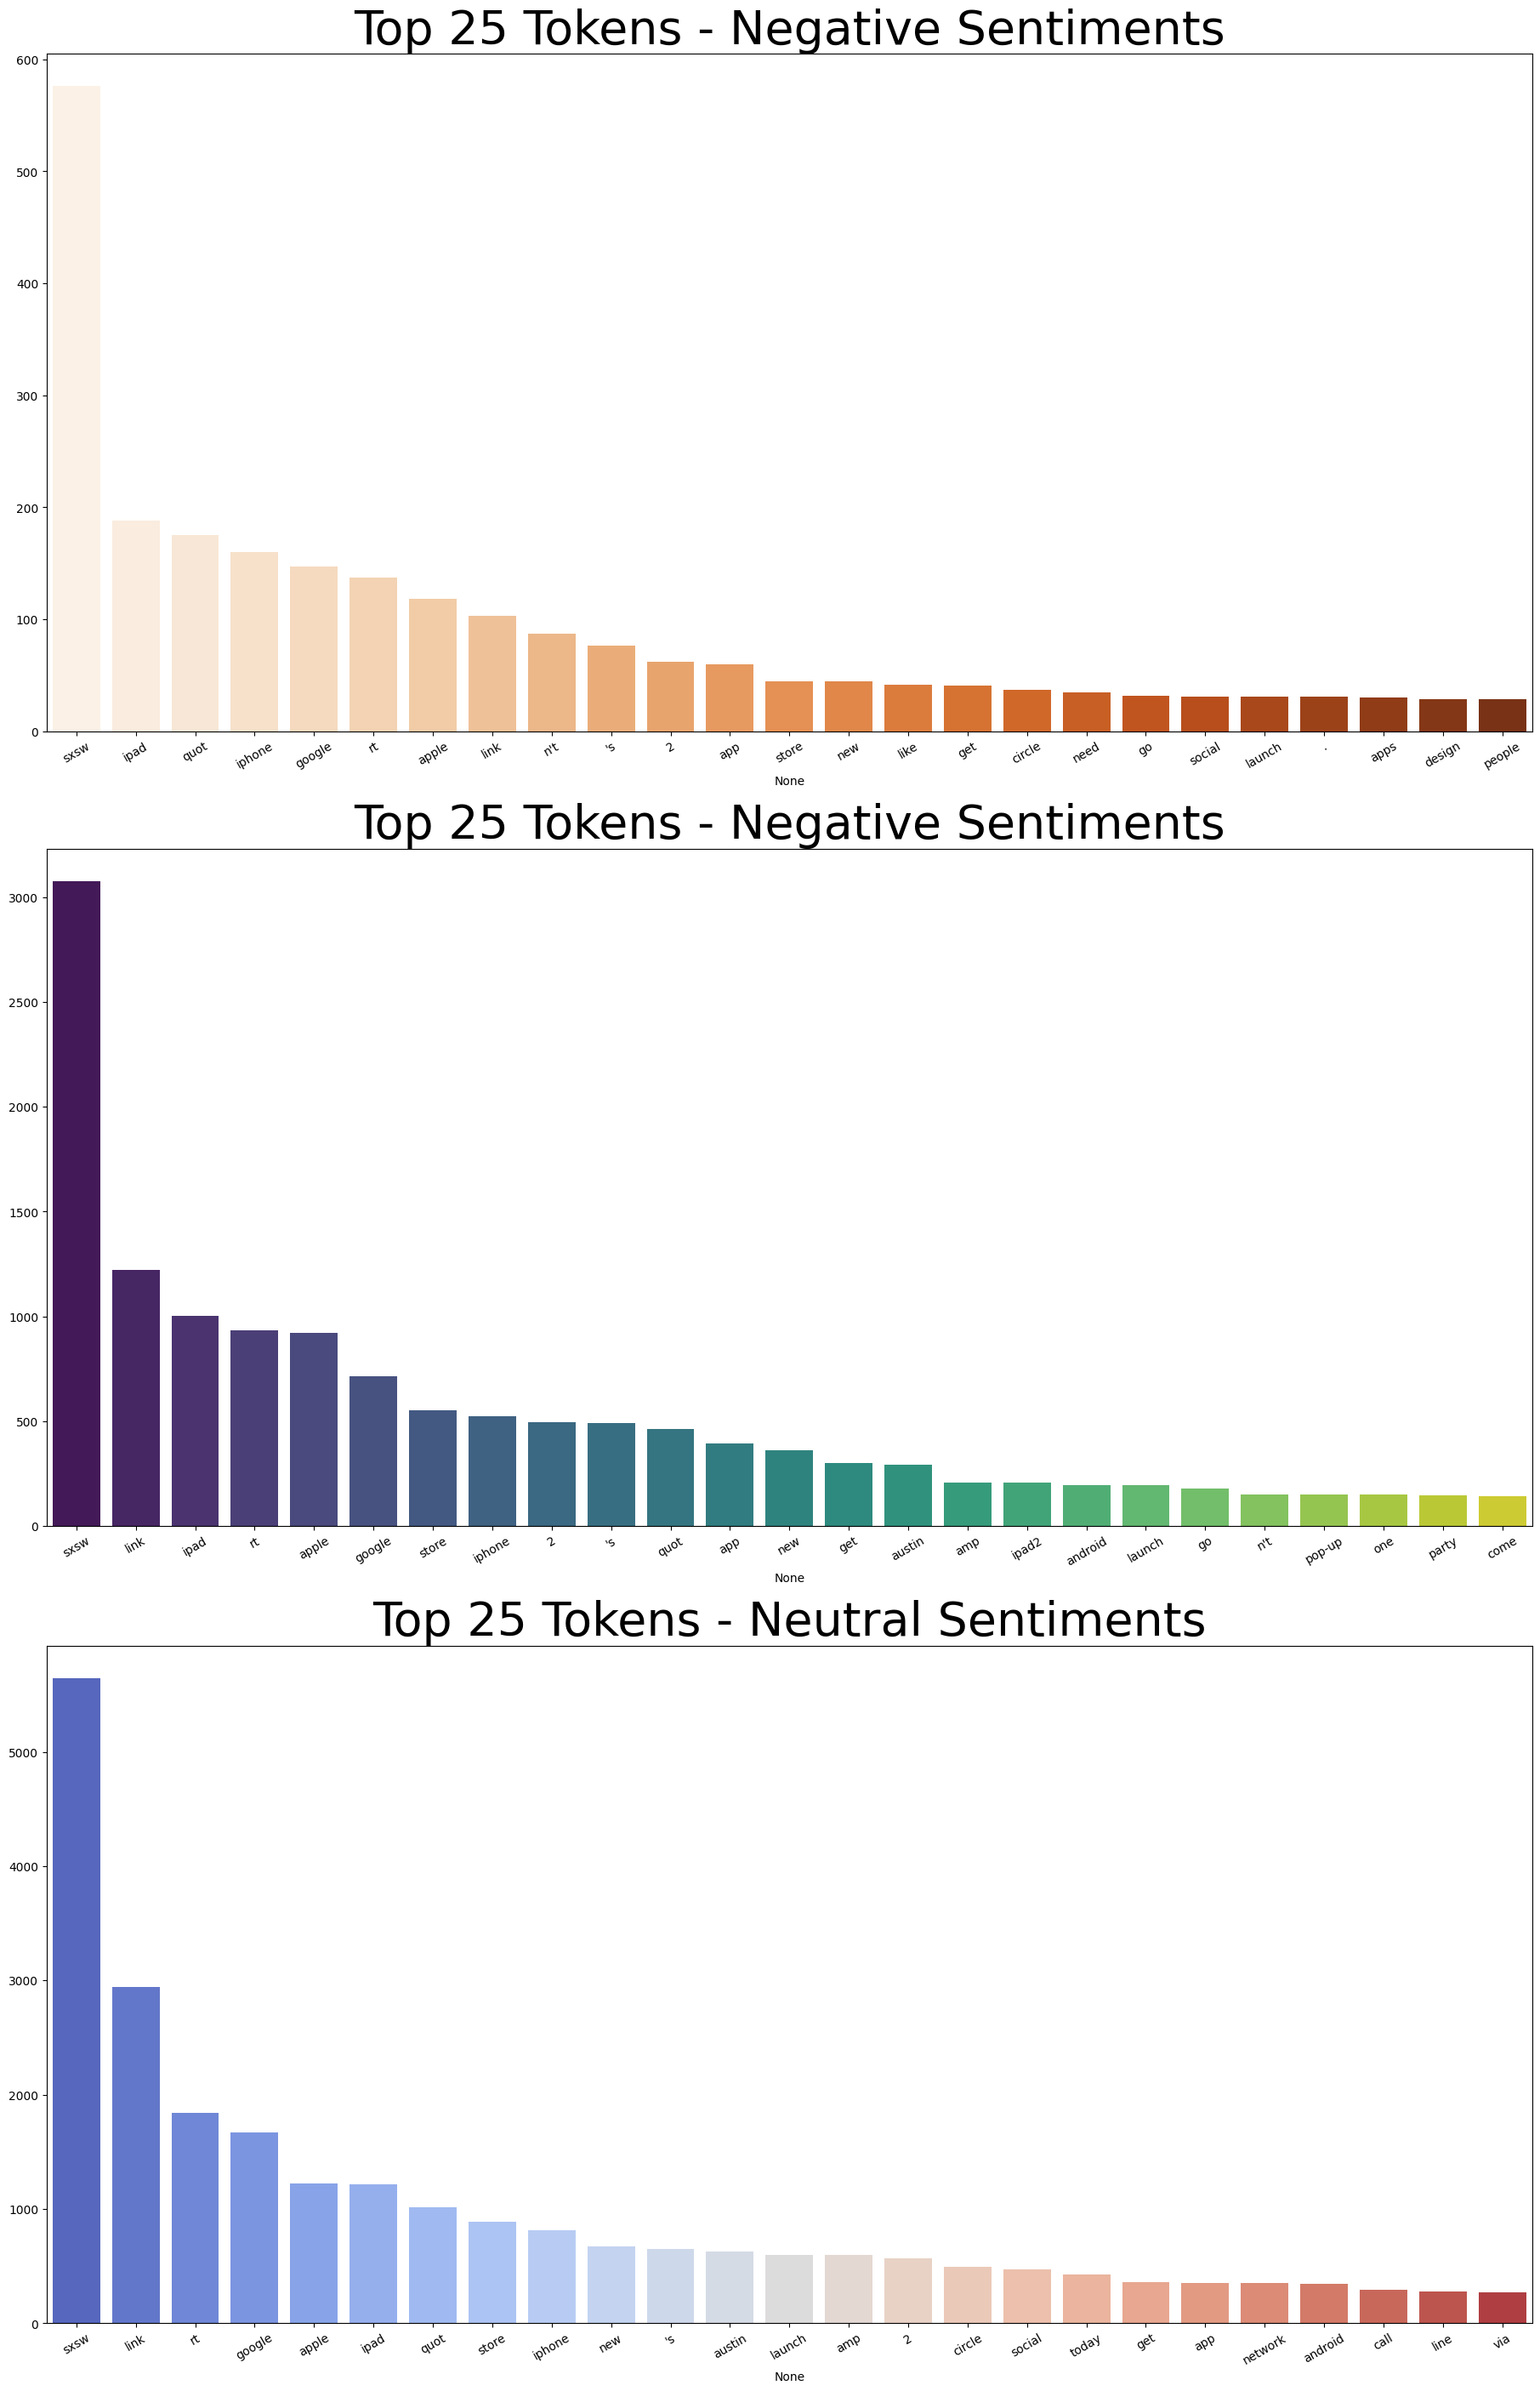

In [103]:
#create subplots
fig,axes = plt.subplots(3,1, figsize = (18, 28), constrained_layout = True)
axes = axes.flatten()

# define colormaps
colormaps = ["Oranges", "viridis", "coolwarm"]

# creating Freqdist for whole Bow, keeping the 25 most common tokens
neg_tokens = word_tokenize(negative_words) # tokenize negative words

#frequency distriution for top 25 tokens
all_fdist_neg = FreqDist(neg_tokens).most_common(25)

all_fdist_neg = pd.Series(dict(all_fdist_neg)) #conversion to panda series for ease of plotting

#bar plot on first subplot
colors = sns.color_palette(colormaps[0], len(all_fdist_neg))
sns.barplot(
    x=all_fdist_neg.index, 
    y=all_fdist_neg.values,
    ax=axes[0],
    palette=colors)
axes[0].set_title("Top 25 Tokens - Negative Sentiments", fontsize = 40)
axes[0].tick_params(axis='x', rotation=30)
fig.savefig("images/top25_negative_words.jpeg", format="jpeg", dpi=300)


# creating Freqdist for whole Bow, keeping the 25 most common tokens
pos_tokens = word_tokenize(positive_words) # tokenize negative words

#frequency distriution for top 25 tokens
all_fdist_pos = FreqDist(pos_tokens).most_common(25)

all_fdist_pos = pd.Series(dict(all_fdist_pos)) #conversion to panda series for ease of plotting

#bar plot on second subplot
colors = sns.color_palette(colormaps[1], len(all_fdist_pos))
sns.barplot(
    x=all_fdist_pos.index, 
    y=all_fdist_pos.values,
    ax=axes[1],
    palette=colors)
axes[1].set_title("Top 25 Tokens - Negative Sentiments", fontsize = 40)
axes[1].tick_params(axis='x', rotation=30)
fig.savefig("images/top25_positive_words.jpeg", format="jpeg", dpi=300)


# creating Freqdist for whole Bow, keeping the 25 most common tokens
neu_tokens = word_tokenize(neutral_words) # tokenize negative words

#frequency distriution for top 25 tokens
all_fdist_neu = FreqDist(neu_tokens).most_common(25)

all_fdist_neu = pd.Series(dict(all_fdist_neu)) #conversion to panda series for ease of plotting

#bar plot on third subplot
colors = sns.color_palette(colormaps[2], len(all_fdist_neu))
sns.barplot(
    x=all_fdist_neu.index, 
    y=all_fdist_neu.values,
    ax=axes[2],
    palette=colors)
axes[2].set_title("Top 25 Tokens - Neutral Sentiments", fontsize = 40)
axes[2].tick_params(axis='x', rotation=30)
fig.savefig("images/top25_neutral_words.jpeg", format="jpeg", dpi=300)

plt.show()

# **4. Modelling**
## **4.1 Data Preprocessing**
Select the feature variable (X) and target variable (y). 
Split data into train and test sets for model testing and evaluation

In [104]:
# split data into X and y

X = sentiment_data["cleaned_text"]
y = sentiment_data["sentiment"] # target variable

# data split into train and test 
X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=42,shuffle=True)

**Model Statistics**
Accuracy and Recall will be the main metric used to track model performance. However, accuracy recall, auc and f1 score will also be computed to provide additional details about the model using sklearn's classification_report function().